In [1]:
# Load Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

from load_datasource import CSVData, get_file_path
from EDA import EDA

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
file = get_file_path('raw_analysit')
df = CSVData(file).load_data()


In [ ]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df = df.drop(columns=['Unnamed: 0'])

###  Descriptive Statistics

In [7]:
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
descr = EDA(df)
descr.data_info()

----Dataset Info.-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB
None


 ----Identify Null values.-------
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

----Shape of the dataset.-------
(1407328, 5)


In [5]:
descr.stat_summary()


 Numerical Features Summary:
             count  unique                                                top  \
headline   1407328  845770                            Benzinga's Top Upgrades   
url        1407328  883429  https://www.benzinga.com/news/20/03/15538835/s...   
publisher  1407328    1034                                      Paul Quintaro   
date       1407328   39957                                2020-03-12 00:00:00   
stock      1407328    6204                                                MRK   

             freq  
headline     5449  
url          1704  
publisher  228373  
date         1766  
stock        3333  

 Categorical Features Summary:
                       headline  \
count                   1407328   
unique                   845770   
top     Benzinga's Top Upgrades   
freq                       5449   

                                                      url      publisher  \
count                                             1407328        1407328   
uni

Textual Length of Headline
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

 The Longest Headlines:
                                                 headline  headline_length
701748  JinkoSolar Tiger Pro Series Receives World's F...              512
238137  Check Point® Software Technologies Ltd. (NASDA...              509
172392  Shares of several financial services companies...              458
753834  Shares of several financial services companies...              458
140048  Shares of several financial services companies...              458


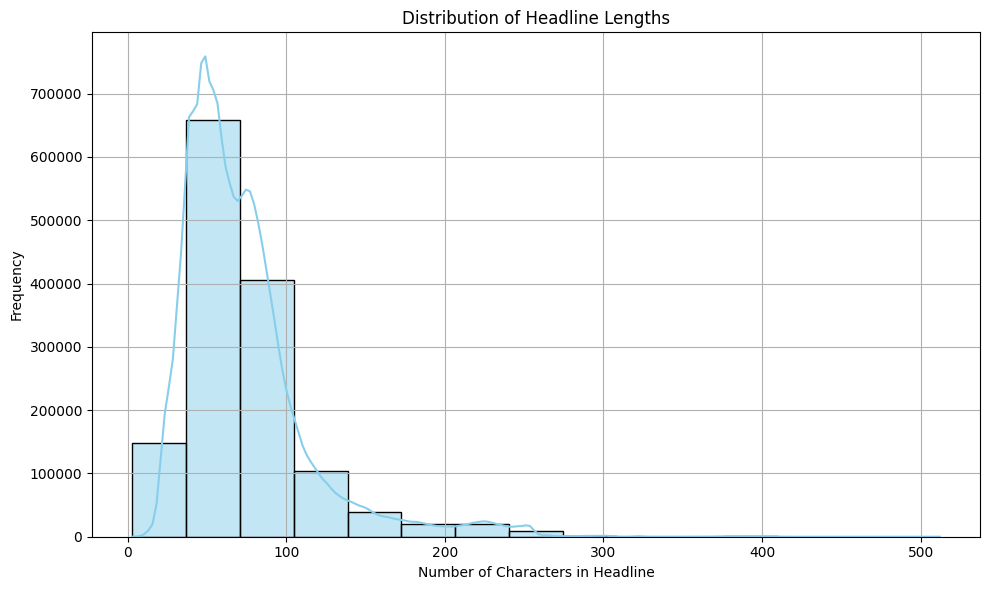

In [6]:
descr.descriptive_stat()


 Number of Articles published by different publisher
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


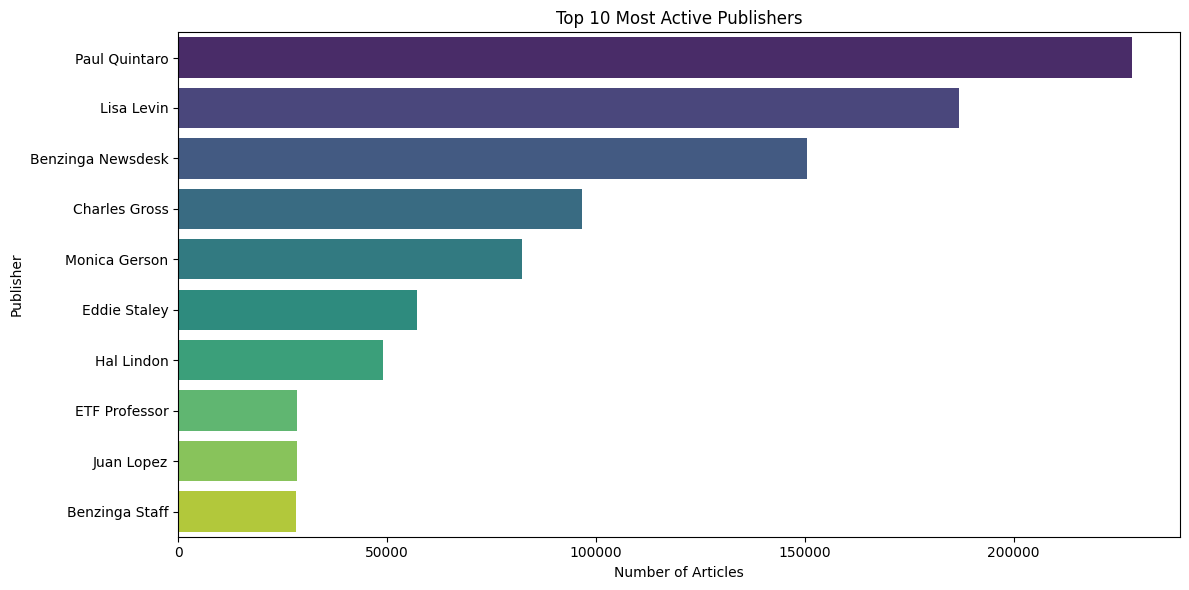

In [5]:
descr.article_per_publisher()

date
2011-04-27 00:00:00-04:00      1
2011-04-28 00:00:00-04:00      2
2011-04-29 00:00:00-04:00      2
2011-04-30 00:00:00-04:00      1
2011-05-01 00:00:00-04:00      1
                            ... 
2020-06-07 00:00:00-04:00     25
2020-06-08 00:00:00-04:00    765
2020-06-09 00:00:00-04:00    804
2020-06-10 00:00:00-04:00    806
2020-06-11 00:00:00-04:00    544
Freq: D, Length: 3334, dtype: int64


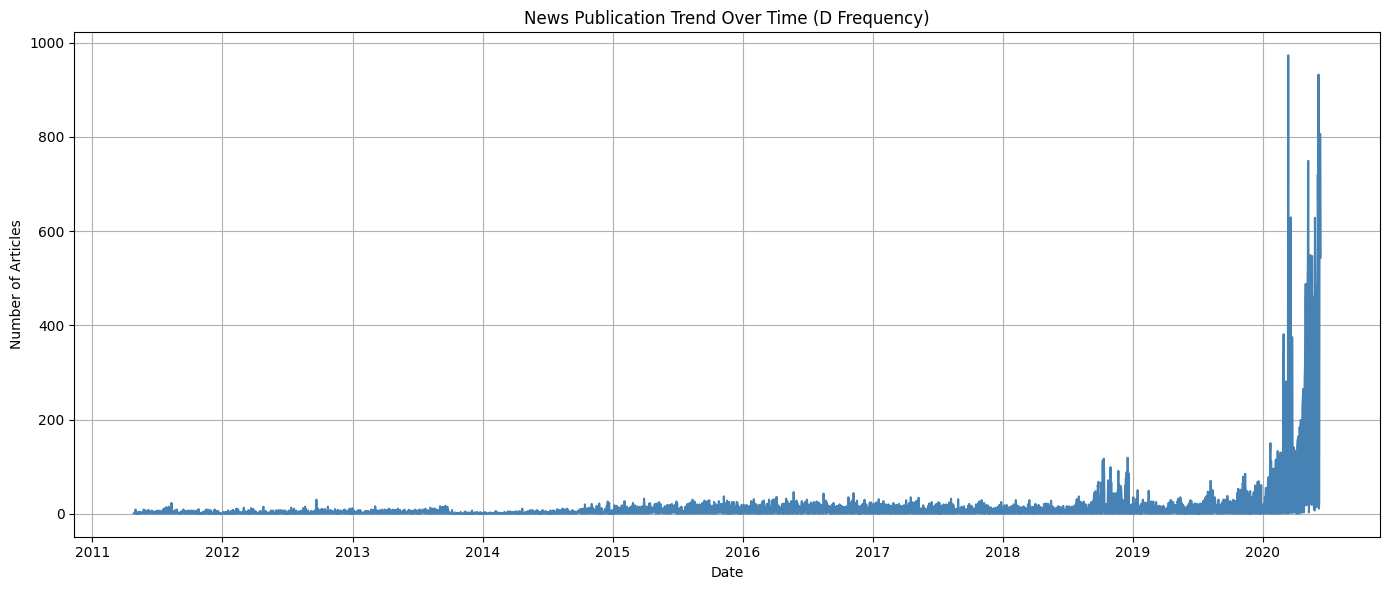

In [7]:
descr.publication_trends()

##   Text Analysis

        phrase   count
0           vs  162061
1       stocks  161869
2          est  140578
3          eps  128910
4       shares  114182
5      reports  108705
6       update   91680
7       market   90880
8     earnings   87189
9        sales   79524
10          pt   73043
11   announces   66528
12       price   64233
13         buy   64059
14  downgrades   61942
15     trading   61156
16      raises   57798
17    upgrades   56804
18   benzingas   54907
19      target   54616


c:\Users\Specter\Documents\Tenx_Academy\Week-1\Financial-News-and-Stock-Price-Analysis\scripts\EDA.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_df, x='count', y='phrase', palette='crest')


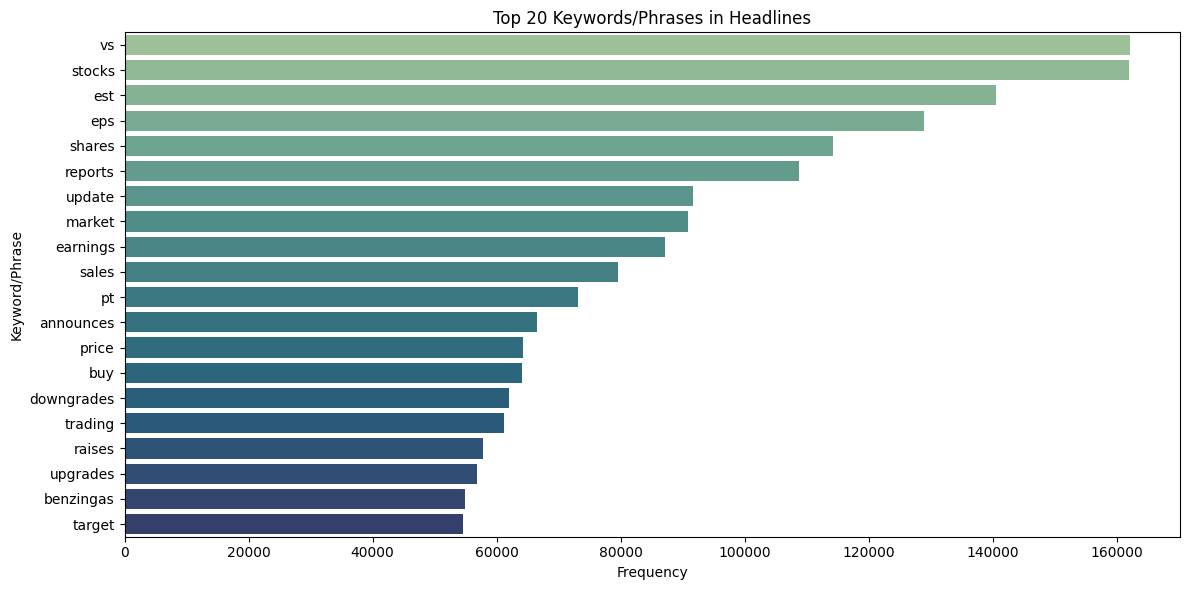

In [5]:
descr.extract_keywords()